In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

# Pandas

Pictures are for fun. No need to add them to your notebook!

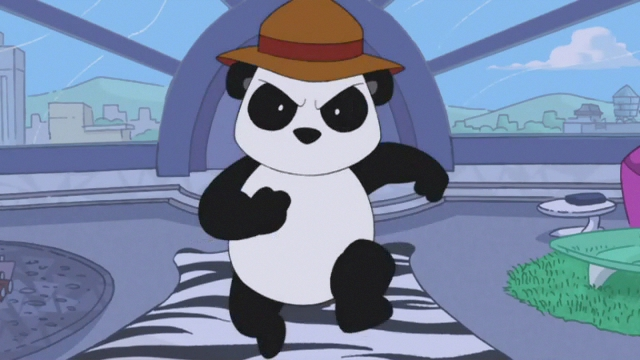

In [3]:
from IPython.display import Image
Image(filename='PeterPanda2-phineas-pherb.jpg',width=400)

# Automated Pandas?

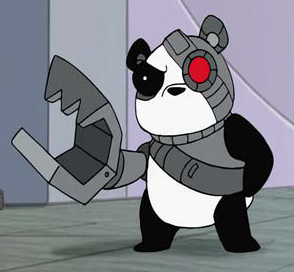

In [4]:
from IPython.display import Image
Image(filename='Pandaborg.jpg',width=400)

Today we want to automate a few things in pandas.  this means we will need to clean up our coding and call things in a better method.  I will walk you through it.  Lets read in our file and get started.  We will use well_data.csv again.  Look on courseworks and you will see our goal is making a file with the graphs we want.  I kept the df in the name as it is a dataframe

In [5]:
pwd

'/Users/bmaillou/Documents/work-teaching/python/spring 24/BigDataPython'

In [6]:
df=pd.read_csv('well_data.csv')

Now instead of using 'As' lets set i to 'As' and try and call it. **Remember** I am using head() to save space printing. You do not need it for class.

In [7]:
i='As'
df[i]

0            NaN
1            NaN
2            NaN
3       78.97747
4            NaN
         ...    
754      0.13000
755     17.39000
756    112.37000
757    248.93000
758          NaN
Name: As, Length: 759, dtype: float64

We can also do fucntions on it.  Lets call dtype which tells us the data type.

In [6]:
i='As'
df[i].dtype

dtype('float64')

now try setting i to Drink

dtype('O')

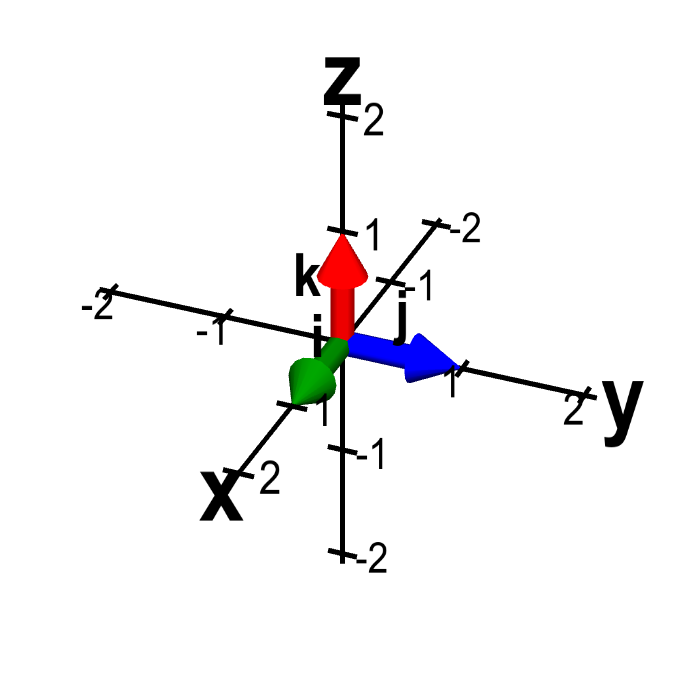

In [8]:
from IPython.display import Image
Image(filename='standard_unit_vectors_3d.png',width=400)  
#copied from http://mathinsight.org/cross_product_formula

I am not going to go into it. But i,j,k are used for vectors in math and are thus the common names people iterate over.  So i,j,k is the vector in x,y,z space. But you could call it anything.  But i,j,k are simple and easy

In [7]:
I_need_to_think_of_a_better_name='As'
df[I_need_to_think_of_a_better_name]

0            NaN
1            NaN
2            NaN
3       78.97747
4            NaN
         ...    
754      0.13000
755     17.39000
756    112.37000
757    248.93000
758          NaN
Name: As, Length: 759, dtype: float64

now what if we wanted to print the datatypes one by one.  we could use a for loop.  The nice thing about Pandas is you can iterate over the columns automatically.  


In [8]:
for i in df:
    print (i)

Well_ID
Lat
Lon
Depth
Drink
Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


I sort of like calling it col for columns better than i

In [9]:
for col in df:
    print (col)

Well_ID
Lat
Lon
Depth
Drink
Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


Now that you know how to iterate can you go through and print each data type?  

Well_ID  is of type  int64
Lat  is of type  float64
Lon  is of type  float64
Depth  is of type  int64
Drink  is of type  object
Si  is of type  float64
P  is of type  float64
S  is of type  float64
Ca  is of type  float64
Fe  is of type  float64
Ba  is of type  float64
Na  is of type  float64
Mg  is of type  float64
K  is of type  float64
Mn  is of type  float64
As  is of type  float64
Sr  is of type  float64
F  is of type  float64
Cl  is of type  float64
SO4  is of type  float64
Br  is of type  float64


We could use our format to make it cleaner and look prettier.  

Well_ID is of type int64 
Lat     is of type float64
Lon     is of type float64
Depth   is of type int64 
Drink   is of type object
Si      is of type float64
P       is of type float64
S       is of type float64
Ca      is of type float64
Fe      is of type float64
Ba      is of type float64
Na      is of type float64
Mg      is of type float64
K       is of type float64
Mn      is of type float64
As      is of type float64
Sr      is of type float64
F       is of type float64
Cl      is of type float64
SO4     is of type float64
Br      is of type float64


Now lets get our code for printing a graph and instead of saying As. Lets put in i.  this is my original HW answer.  

THERE IS A CONFUSING PART HERE!
1.  We are using arsenic twice in the same graph
1.  We are plotting it
1.  We are also coloring the dots with it.
1.  I would keep the coloring of the dots hardwired with arsenic.   
1.  I use different colors I like a little more
1.  Alpha is how see through the points are.  1=solid 0=invisible.  Sometimes an alpha of 0.5 or 0.75 smoothes the points a bit

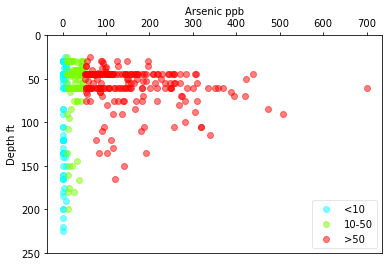

In [15]:
fig,ax=plt.subplots()

#plot <10
ax.scatter(df.As[df.As<10]\
           ,df.Depth[df.As<10]\
           ,color='cyan',alpha=0.5,label='<10')
#plot 10-50
ax.scatter(df.As[np.logical_and(df.As>=10,df.As<=50)],\
           df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
           ,color='lawngreen',alpha=0.5,label='10-50')
#plot<50
ax.scatter(df.As[df.As>50]\
           ,df.Depth[df.As>50]\
           ,color='r',alpha=0.5,label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Arsenic ppb')
ax.set_ylabel('Depth ft')

ax.set_ylim([250,0])
ax.legend(loc=4, fancybox=True, framealpha=0.5)

If you had to drill a well for arsenic what depth would you drill to?  What depth has no high arsenic samples?

To save just one figure you can right click on an image.  But even easier is adding a line of code.  I always add this line

fig.savefig('Name_of_figure.jpg',dpi=200,bbox_inches='tight')

* name the figure and the ending sets the type.  jpg,gif,pdf.....  
* dpi is the dots per inch and is the resolution.  For a fancy figure increase to 600 or so.
* bbox_inches='tight' is this weird key word you need.  If you don't have this and you have a legend, the legend gets cut off.
* It just puts the file in your working directory.  Try it.  

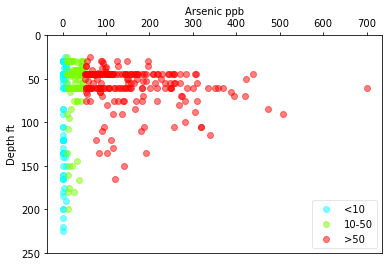

In [23]:
fig,ax=plt.subplots()

#plot <10
ax.scatter(df.As[df.As<10]\
           ,df.Depth[df.As<10]\
           ,color='cyan',alpha=0.5,label='<10')
#plot 10-50
ax.scatter(df.As[np.logical_and(df.As>=10,df.As<=50)],\
           df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
           ,color='lawngreen',alpha=0.5,label='10-50')
#plot<50
ax.scatter(df.As[df.As>50]\
           ,df.Depth[df.As>50]\
           ,color='r',alpha=0.5,label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Arsenic ppb')
ax.set_ylabel('Depth ft')

ax.set_ylim([250,0])
ax.legend(loc=4, fancybox=True, framealpha=0.5)

fig.savefig('Name_of_figure.jpg',dpi=200,bbox_inches='tight')

Now change it to plot iron Fe but give the arsenic colors

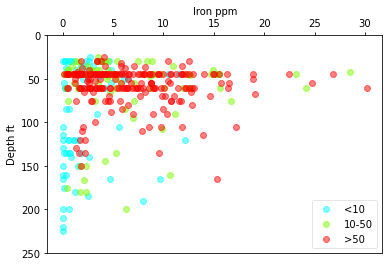

In [16]:
fig,ax=plt.subplots()

#plot <10
ax.scatter(df.Fe[df.As<10],df.Depth[df.As<10]\
           ,color='cyan',alpha=0.5,label='<10')
#plot 10-50
ax.scatter(df.Fe[np.logical_and(df.As>=10,df.As<=50)],\
           df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
           ,color='lawngreen',alpha=0.5,label='10-50')
#plot<50
ax.scatter(df.Fe[df.As>50],df.Depth[df.As>50]\
           ,color='r',alpha=0.5,label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Iron ppm')
ax.set_ylabel('Depth ft')

ax.set_ylim([250,0])
ax.legend(loc=4, fancybox=True, framealpha=0.5)

Now change .Fe to ['Fe']

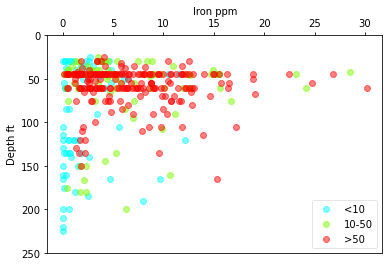

In [17]:
fig,ax=plt.subplots()

#plot <10
ax.scatter(df['Fe'][df.As<10],df.Depth[df.As<10]\
           ,color='cyan',alpha=0.5,label='<10')
#plot 10-50
ax.scatter(df['Fe'][np.logical_and(df.As>=10,df.As<=50)],\
           df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
           ,color='lawngreen',alpha=0.5,label='10-50')
#plot<50
ax.scatter(df['Fe'][df.As>50],df.Depth[df.As>50]\
           ,color='r',alpha=0.5,label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel('Iron ppm')
ax.set_ylabel('Depth ft')

ax.set_ylim([250,0])
ax.legend(loc=4, fancybox=True, framealpha=0.5)

Now lets try it with x='Fe'

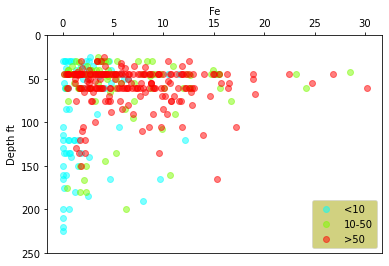

In [19]:
fig,ax=plt.subplots()
x='Fe'
#plot <10
ax.scatter(df[x][df.As<10],df.Depth[df.As<10]\
           ,color='cyan',alpha=0.5,label='<10')
#plot 10-50
ax.scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
           df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
           ,color='lawngreen',alpha=0.5,label='10-50')
#plot<50
ax.scatter(df[x][df.As>50],df.Depth[df.As>50]\
           ,color='r',alpha=0.5,label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel(x)
ax.set_ylabel('Depth ft')

ax.set_ylim([250,0])

ax.legend(loc=4, fancybox=True, framealpha=0.5,facecolor='xkcd:puke')

Now lets try it with x='As'. But we want to keep the As cutoffs.  So don't change the cutoffs.  Do you see how we are color the points by one parameter and plotting another?  

In [23]:
x='As'


Now lets change x to a different element.  Make sure your axis label is also using x.

If you forget the column names...

In [21]:
df.columns

Index(['Well_ID', 'Lat', 'Lon', 'Depth', 'Drink', 'Si', 'P', 'S', 'Ca', 'Fe',
       'Ba', 'Na', 'Mg', 'K', 'Mn', 'As', 'Sr', 'F', 'Cl', 'SO4', 'Br'],
      dtype='object')

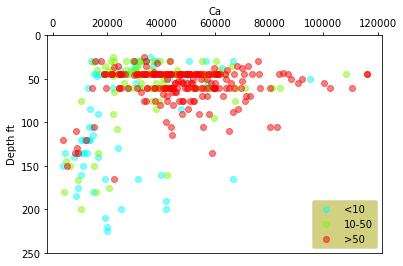

### Goal
A plot of Depth versus every parameter. 

But I want it in one pdf file.  

First just make every graph and see what happens

Combine your for loop with your plotting and make a plot of every parameter

<ipython-input-24-110293c6f30d>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax=plt.subplots()


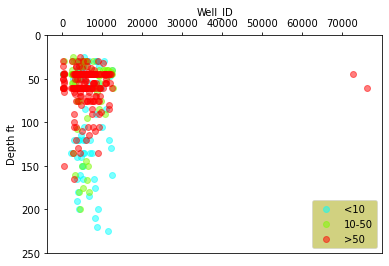

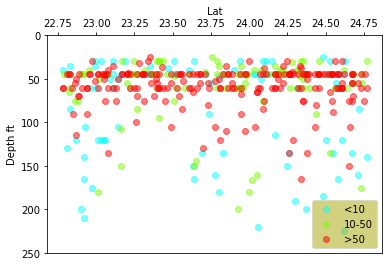

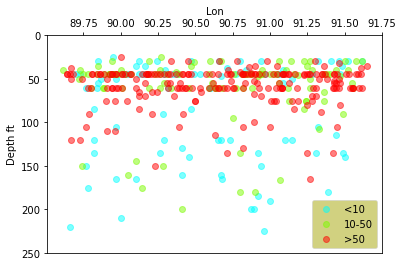

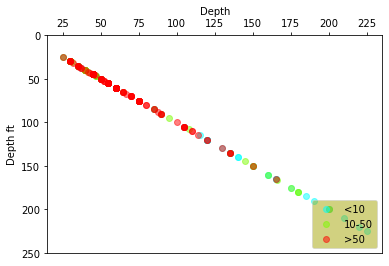

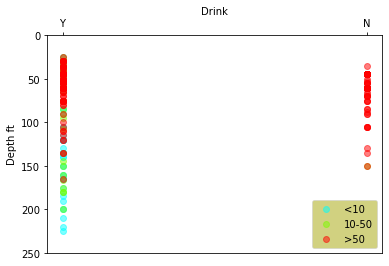

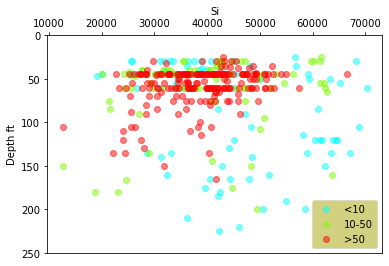

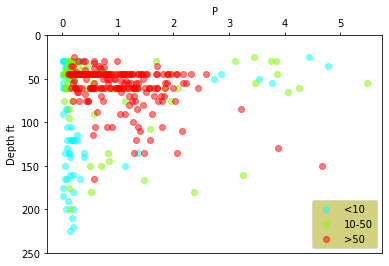

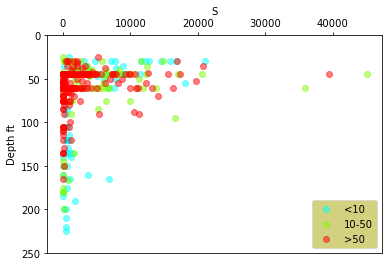

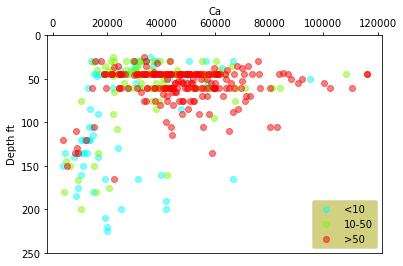

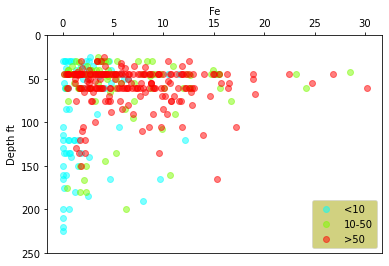

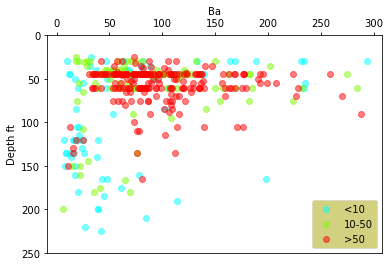

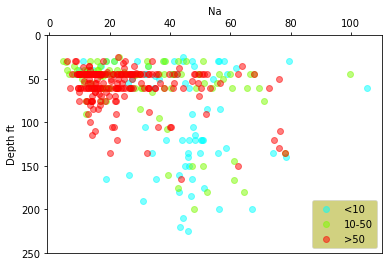

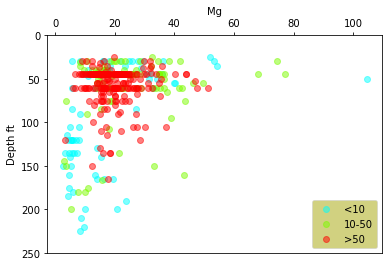

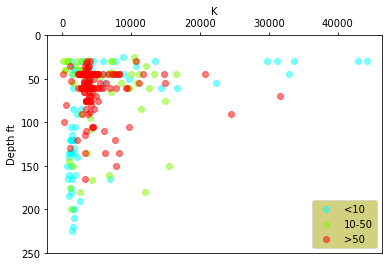

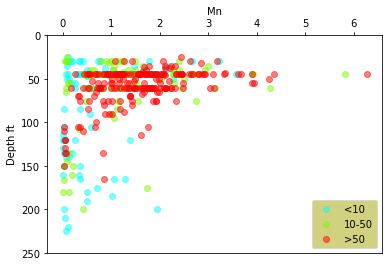

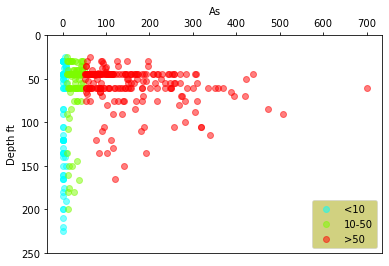

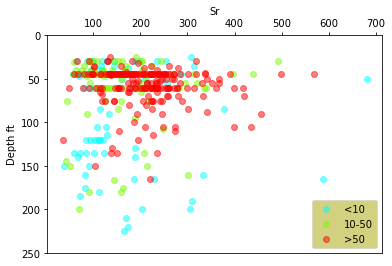

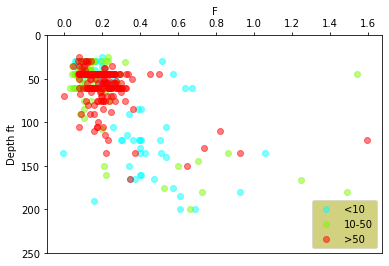

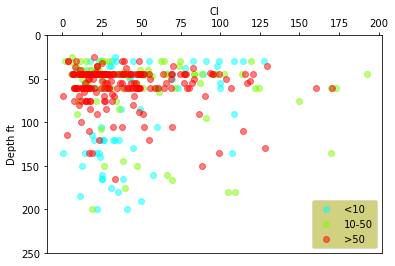

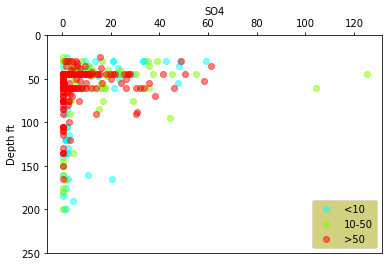

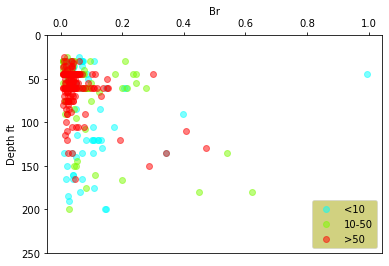

In [24]:
for col in df:

    fig,ax=plt.subplots()
    x=col
    #plot <10
    ax.scatter(df[x][df.As<10],df.Depth[df.As<10]\
               ,color='cyan',alpha=0.5,label='<10')
    #plot 10-50
    ax.scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
               df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
               ,color='lawngreen',alpha=0.5,label='10-50')
    #plot<50
    ax.scatter(df[x][df.As>50],df.Depth[df.As>50]\
               ,color='r',alpha=0.5,label='>50')

    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    ax.set_xlabel(x)
    ax.set_ylabel('Depth ft')

    ax.set_ylim([250,0])

    ax.legend(loc=4, fancybox=True, framealpha=0.5,facecolor='xkcd:puke')

You should have gotten a warning that you are using too mich memory.  It is becauase you are making lots of graphs and never closing them.  Luckily it was easy to do.  But we need to be smarter.  

## Read these notes carefully and take your time. The devil is in the details.  READ THE NOTES!

But I want a file with all the parameters.  
So we still need to learn two things.  
*  We know how to loop. Now lets write to a file 

#### There are two ways to write to files and we are going to do both. They are both useful.  
1.  Make a one page jpg or png like we did before.  
1.  Make a multipage pdf.

I showed you how easy it is to make a jpg.  Now lets make our multipage pdf

For a file we want pdf becuase we can do multiple pages.  so if we google matplotlib write to file we get this faq page  http://matplotlib.org/faq/howto_faq.html#save-multiple-plots-to-one-pdf-file  But I found that not helpful.  So I found this stackoverflow as the easiest.  https://stackoverflow.com/questions/21364405/saving-plots-to-pdf-files-using-matplotlib so we need to import from matplotlib.backends.backend_pdf import PdfPages which we did above.  then it is three steps.


1. import from matplotlib.backends.backend_pdf import PdfPages 
1. Open the file.  pp = PdfPages('multipage.pdf')
2. save the graph.  pp.savefig()
1. clear the axes ax.cla()
3. Close the file so we can open it somewhere else. pp.close()

so basically pp references our file and we are doing things to it.  We keep adding pages to the file pp.  When are done we close it.

so lets try it. 

You have to close it!!!! Otherwise it gets stuck open on your computer and you can't do anything with it.  If it gets stuck open just make a new file name next time you run the cell

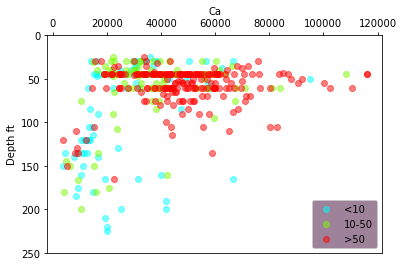

In [10]:
pp = PdfPages('filetest.pdf')

fig,ax=plt.subplots()
x='Ca'
#plot <10
ax.scatter(df[x][df.As<10],df.Depth[df.As<10]\
           ,color='cyan',alpha=0.5,label='<10')
#plot 10-50
ax.scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
           df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
           ,color='lawngreen',alpha=0.5,label='10-50')
#plot<50
ax.scatter(df[x][df.As>50],df.Depth[df.As>50]\
           ,color='r',alpha=0.5,label='>50')

ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
ax.set_xlabel(x)
ax.set_ylabel('Depth ft')

ax.set_ylim([250,0])

ax.legend(loc=4, fancybox=True, framealpha=0.5,facecolor='xkcd:aubergine')

pp.savefig()
pp.close()

### Important note

Hopefully you now have a file.  files can get buggy.  I usually have to delete the file before running the program and sometimes have to change file names.  But it is nice.

Now lets try and add a for loop around the graphs and see if we can plot them all.  remember to put the open and close outside of the for loop.   Also, we need to make our subplots outside the for loop.  This will make more sense later.  But for my first try I get a crazy plot!  Look at your pdf file.  What do you think is happening?  make sure to add your ax.cla().  I also like to print col to see my progress

Well_ID
Lat
Lon
Depth
Drink
Si
P
S
Ca
Fe
Ba
Na
Mg
K
Mn
As
Sr
F
Cl
SO4
Br


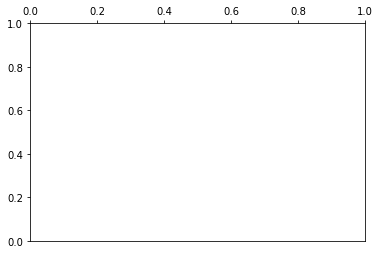

In [12]:
pp = PdfPages('filetest.pdf')

fig,ax=plt.subplots()

for col in df:
    print(col)
    x=col
    #plot <10
    ax.scatter(df[x][df.As<10],df.Depth[df.As<10]\
               ,color='cyan',alpha=0.5,label='<10')
    #plot 10-50
    ax.scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
               df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
               ,color='lawngreen',alpha=0.5,label='10-50')
    #plot<50
    ax.scatter(df[x][df.As>50],df.Depth[df.As>50]\
               ,color='r',alpha=0.5,label='>50')

    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    ax.set_xlabel(x)
    ax.set_ylabel('Depth ft')

    ax.set_ylim([250,0])

    ax.legend(loc=4, fancybox=True, framealpha=0.5,facecolor='xkcd:aubergine')

    pp.savefig()
    ax.cla()
pp.close()

You might get an error or a crazy plot.  If yes then you need to debug!



### you should now have a file with all your data.  I love that.  

Now after looking at all the data I realize I want to plot As, F, S on 3 plots next to each other.  lets see if we can do this.  here is an example. http://matplotlib.org/examples/pylab_examples/subplots_demo.html  So if you look I want to share a y-axis.  Lets try..... Lets see if we can learn. I am nervous as these plot always give me trouble 
* so I going to start simple and just use our code for plotting less than 10.   
* In subplots we will get three sets of axes.  One for each plot.  
* Also, I am telling it to give me 1 row by 3 columns.  then we are going to share the y-axes.  
* To make thigs easier I am going to just show the less than 10 data first. 
* Also since we have 3 plots on one page we have 1 fig and 3 ax values.  

For this work I was using i to call the element name.  You can use any variable name to name the integer.  Go back into your code and change i to something more intuitive.  It could be j? it could be k?  It could be element_name.  It could be I_CANT_THINK_OF_ANYTHING  It is your choice. But change the name and make it work again! 

(250.0, 0.0)

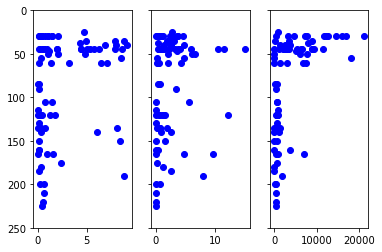

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

x='As'
ax1.scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,color='b',label='<10')

x='Fe'
ax2.scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,color='b',label='<10')

x='S'
ax3.scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,color='b',label='<10')

ax1.set_ylim([250,0])

First step is I am going to make my ax into a list/array.

Imagine we wanted 2, 5, or 10 plots.  We don't want to write ax10 etc.   We can make an array so we can loop over it.

(250.0, 0.0)

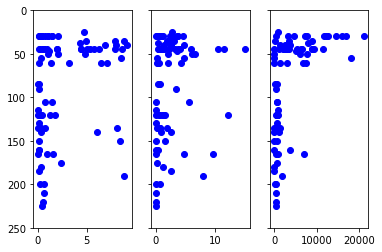

In [16]:
fig, ax = plt.subplots(1, 3, sharey=True)

x='As'
ax[0].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,color='b',label='<10')

x='Fe'
ax[1].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,color='b',label='<10')

x='S'
ax[2].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,color='b',label='<10')

ax[0].set_ylim([250,0])

ax[0].set_ylim([250,0])  #since we have sharey we only need to set one.

That is really encouraging.  But we have to get rid of the hardwires and do it in a for loop eventually.  This way we could just choose our parameters and it would do it. So lets go back and do for loops.

In [17]:
elements=['As','Fe','S']
for el in elements:
    print(el)

As
Fe
S


Now we could look at each of those data.

In [18]:
elements=['As','Fe','S']
for el in elements:
    print (df[el])

0            NaN
1            NaN
2            NaN
3       78.97747
4            NaN
         ...    
754      0.13000
755     17.39000
756    112.37000
757    248.93000
758          NaN
Name: As, Length: 759, dtype: float64
0            NaN
1            NaN
2            NaN
3       1.260031
4            NaN
         ...    
754     0.341200
755     1.498350
756    22.417560
757    12.793100
758          NaN
Name: Fe, Length: 759, dtype: float64
0               NaN
1               NaN
2               NaN
3       2085.570979
4               NaN
           ...     
754     3669.430000
755    13771.370000
756       38.300000
757     4168.520000
758             NaN
Name: S, Length: 759, dtype: float64


## Flashback to for loops.  This is what I wrote in the notes! 

Python has a simple trick to count through a list and give you the list and the count.  It may not make sense now but it will later in the semester!

This is the example I gave.

In [24]:
mystrlist=['env','chem','bio','psych']
for i,mystr in enumerate(mystrlist):
    print (i,mystr)

0 env
1 chem
2 bio
3 psych


Now lets do it for our elements!

In [20]:
elements=['As','Fe','S']
for count, el in enumerate(elements):
    print (count,el)

0 As
1 Fe
2 S


Lets keep getting rid of hard wires.  Now instead of doing subplots(1,3) lets use the length of elems! 

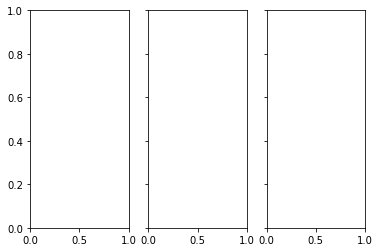

In [21]:
elements=['As','Fe','S']
fig, ax = plt.subplots(1, len(elements), sharey=True)


Now lets add our for loop to after we make the plots.  

0 As
1 Fe
2 S


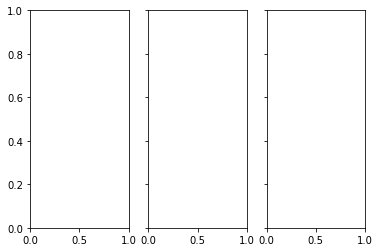

In [22]:
elements=['As','Fe','S']
fig, ax = plt.subplots(1, len(elements), sharey=True)
for count,el in enumerate(elements):
    print (count,el)

Now instead of printing lets call the correct ax and plot the elements.  

(250.0, 0.0)

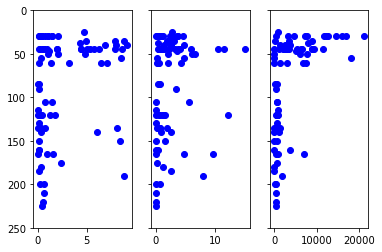

In [23]:
elements=['As','Fe','S']
fig, ax = plt.subplots(1, len(elements), sharey=True)

for count,el in enumerate(elements):
    x=el
    ax[count].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,color='b',label='<10')

ax[0].set_ylim([250,0])

Now lets add the full data set!

(250.0, 0.0)

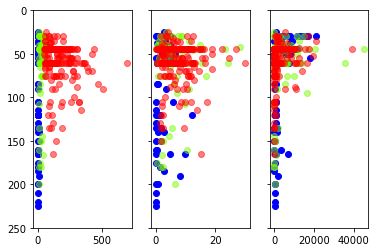

This is looking great.  Lets see if we can clean it up.  Also, lets label the y axis.  and make the whole thing bigger!  
I use fig.set_size_inches(width,height)
then I use ax.locator_params(nbins=4,axis='x') to set the number of ticks on the x axis.  

(250.0, 0.0)

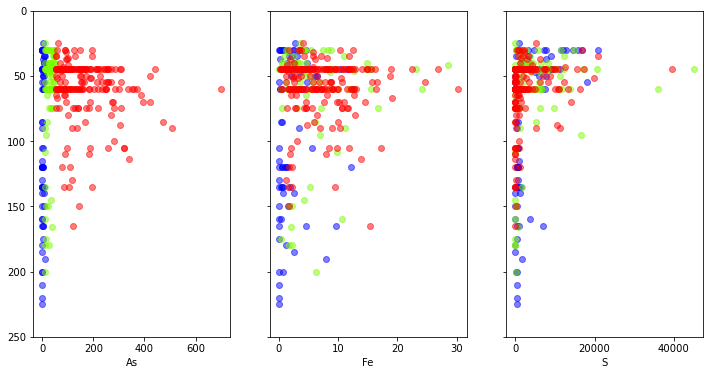

In [32]:
elements=['As','Fe','S']
fig, ax = plt.subplots(1, len(elements), sharey=True)
fig.set_size_inches(12,6)

for count,el in enumerate(elements):
    x=el
    #plot <10
    ax[count].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,alpha=0.5,color='b',label='<10')
    #plot 10-50
    ax[count].scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
               df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
               ,color='lawngreen',alpha=0.5,label='10-50')
    #plot<50
    ax[count].scatter(df[x][df.As>50],df.Depth[df.As>50]\
               ,color='r',alpha=0.5,label='>50')
       
    ax[count].set_xlabel(x) #labels with the element
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    
ax[0].set_ylim([250,0])

To prove this works add two more parameters to elem.  

(250.0, 0.0)

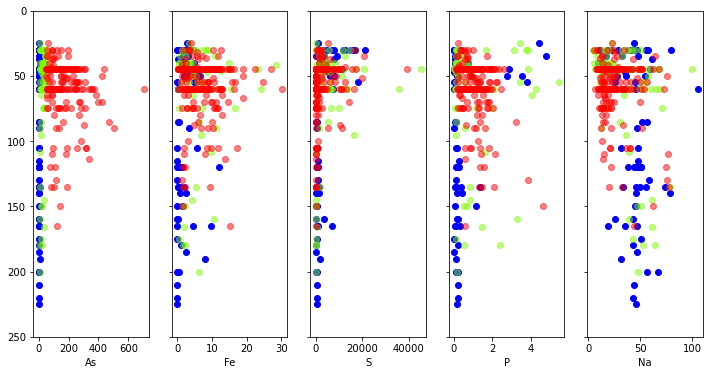

Now as I am prepping for class I realize that it is hard to see all the points on the graph.  So i think we should make them more transparent or open.  
* Transparencey is controlled by alpha.  alpha= and then a number. 
* It works well if you set alpha once and then say alpha=alpha.  So you can easily change alpha.  
* To make them one add facecolor='none'
* Then play with alpha and facecolor to see if you can find a combination you like.

After looking at the graph I don't like the transparency.  I think it is sort of ugly.  so instead lets try open circles instead.  To do this you use the key words

facecolor='none'  this is saying no colors filling in.  You could set this color.

edgecolors=  This sets the edgecolor instead of the whole color.  So you can use the keyword color or edgecolor

We almost forgot a y label!

This is the link for tick_params.  https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.tick_params.html
I used it to make the fonts larger.  I think that looks nicer

Plus we forgot a legend.  We have the labels. But we only need one. So just do it after the for loop.

Plus save it to a jpg

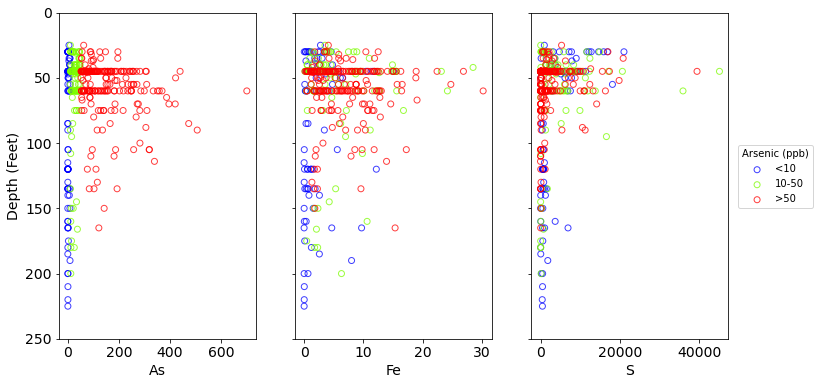

In [44]:
elements=['As','Fe','S']
fig, ax = plt.subplots(1, len(elements), sharey=True)
fig.set_size_inches(12,6)
alpha=0.75

for count,el in enumerate(elements):
    x=el
    #plot <10
    ax[count].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,alpha=alpha,color='b',label='<10',facecolor='none')
    #plot 10-50
    ax[count].scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
               df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
               ,color='lawngreen',alpha=alpha,label='10-50',facecolor='none')
    #plot<50
    ax[count].scatter(df[x][df.As>50],df.Depth[df.As>50]\
               ,color='r',alpha=alpha,label='>50',facecolor='none')
       
    ax[count].set_xlabel(x) #labels with the element
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    
    ax[count].set_xlabel(el,fontsize=14) #labels with the element
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    ax[count].tick_params(axis = 'both', which = 'major', labelsize = 14)
    
    
ax[0].set_ylim([250,0])
ax[0].set_ylabel('Depth (Feet)',fontsize=14)

ax[count].legend(title='Arsenic (ppb)',loc=(1.05,0.4))

fig.savefig('Three_depth_plots.jpg',dpi=200,bbox_inches='tight')

Now with five elements

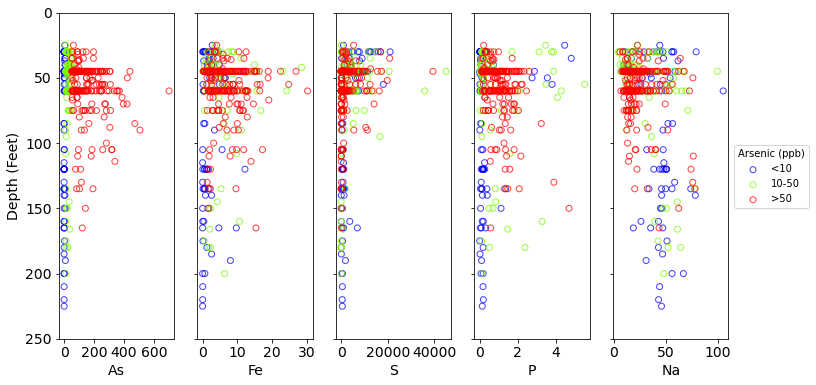

That appears nicer! But beauty is in the eye of the beholder.  You can choose what you think makes a nice and professional graph 

## I still forgot one thing.  If you want to publish it you need to label your graphs a,b,c, etc. 

We will add these the same way we added the regression properties but instead we are going to add a letter.  This is going to get weird to convert a number to a letter.  
1.  define your props-properties for your bbox-bounding box.
1.  define your letter.  this is weird.  You are going to take the ascii number that is A.  ord('A') then add our counter to it and turn it back to a letter.  Adding a 0 is A, adding a 1 is a B.
1.  Then we will place our letters ising ax.text.  Remember we have to transfrom from absolute axis to percent axis.  That is what transform does.  
1. Finally save the figure to a file.  Since it is one page we will save to a jpg.  The function you call is fig.savefig('filename.jpg',dpi=600,bbox_inches = 'tight')   The dpi is dots per inch.  higher is higher resolution but fileszie gets bigger.  I think default is 300 but higher is sometimes nice.  The bbox_incehs just makes sure nothing is cutoff.  It is good to include.




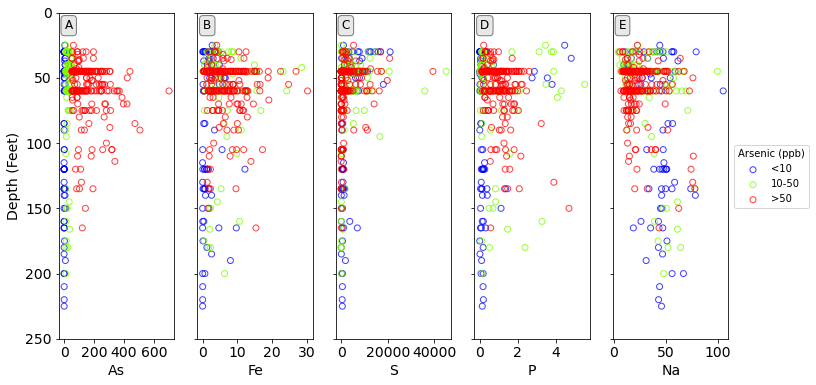

In [50]:
props=dict(boxstyle='round',facecolor='lightgrey',alpha=0.5)

elements=['As','Fe','S','P','Na']
fig, ax = plt.subplots(1, len(elements), sharey=True)
fig.set_size_inches(12,6)
alpha=0.75

for count,el in enumerate(elements):
    x=el
    #plot <10
    ax[count].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,alpha=alpha,color='b',label='<10',facecolor='none')
    #plot 10-50
    ax[count].scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
               df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
               ,color='lawngreen',alpha=alpha,label='10-50',facecolor='none')
    #plot<50
    ax[count].scatter(df[x][df.As>50],df.Depth[df.As>50]\
               ,color='r',alpha=alpha,label='>50',facecolor='none')
       
    ax[count].set_xlabel(x) #labels with the element
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    
    ax[count].set_xlabel(el,fontsize=14) #labels with the element
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    ax[count].tick_params(axis = 'both', which = 'major', labelsize = 14)
        
    ax[count].text(0.05,0.98,chr(count + ord('A')),transform=ax[count].transAxes\
                   ,fontsize=12,verticalalignment='top',bbox=props)
    
    
ax[0].set_ylim([250,0])
ax[0].set_ylabel('Depth (Feet)',fontsize=14)

ax[count].legend(title='Arsenic (ppb)',loc=(1.05,0.4))

fig.savefig('Three_depth_plots.jpg',dpi=400,bbox_inches='tight')


# Answers

In [10]:
i='Drink'
df[i].dtype

dtype('O')

In [12]:
for col in df:
    print (col,' is of type ',df[col].dtype)

Well_ID  is of type  int64
Lat  is of type  float64
Lon  is of type  float64
Depth  is of type  int64
Drink  is of type  object
Si  is of type  float64
P  is of type  float64
S  is of type  float64
Ca  is of type  float64
Fe  is of type  float64
Ba  is of type  float64
Na  is of type  float64
Mg  is of type  float64
K  is of type  float64
Mn  is of type  float64
As  is of type  float64
Sr  is of type  float64
F  is of type  float64
Cl  is of type  float64
SO4  is of type  float64
Br  is of type  float64


In [14]:
for col in df:
    print ('{:7s} is of type {:7s}'.format(col,str(df[col].dtype)))

Well_ID is of type int64  
Lat     is of type float64
Lon     is of type float64
Depth   is of type int64  
Drink   is of type object 
Si      is of type float64
P       is of type float64
S       is of type float64
Ca      is of type float64
Fe      is of type float64
Ba      is of type float64
Na      is of type float64
Mg      is of type float64
K       is of type float64
Mn      is of type float64
As      is of type float64
Sr      is of type float64
F       is of type float64
Cl      is of type float64
SO4     is of type float64
Br      is of type float64


(250.0, 0.0)

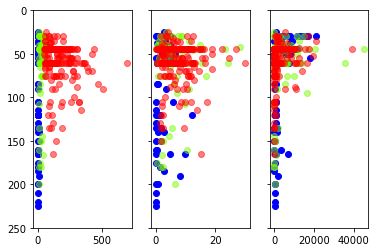

In [25]:
elements=['As','Fe','S']
fig, ax = plt.subplots(1, len(elements), sharey=True)

for count,el in enumerate(elements):
    x=el
    #plot <10
    ax[count].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,color='b',label='<10')
    #plot 10-50
    ax[count].scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
               df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
               ,color='lawngreen',alpha=0.5,label='10-50')
    #plot<50
    ax[count].scatter(df[x][df.As>50],df.Depth[df.As>50]\
               ,color='r',alpha=0.5,label='>50')
    
    
ax[0].set_ylim([250,0])

(250.0, 0.0)

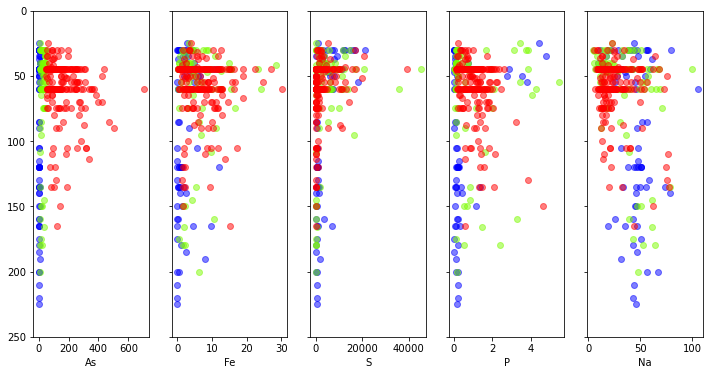

In [34]:
elements=['As','Fe','S','P','Na']
fig, ax = plt.subplots(1, len(elements), sharey=True)
fig.set_size_inches(12,6)

for count,el in enumerate(elements):
    x=el
    #plot <10
    ax[count].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,alpha=0.5,color='b',label='<10')
    #plot 10-50
    ax[count].scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
               df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
               ,color='lawngreen',alpha=0.5,label='10-50')
    #plot<50
    ax[count].scatter(df[x][df.As>50],df.Depth[df.As>50]\
               ,color='r',alpha=0.5,label='>50')
       
    ax[count].set_xlabel(x) #labels with the element
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    
ax[0].set_ylim([250,0])

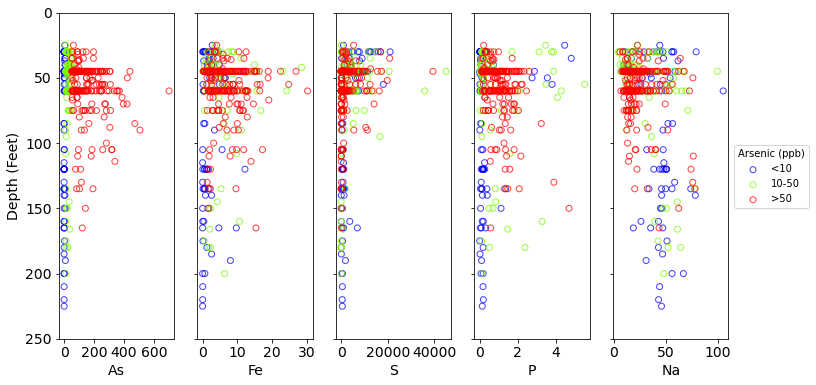

In [45]:
elements=['As','Fe','S','P','Na']
fig, ax = plt.subplots(1, len(elements), sharey=True)
fig.set_size_inches(12,6)
alpha=0.75

for count,el in enumerate(elements):
    x=el
    #plot <10
    ax[count].scatter(df[x][df.As<10],df.Depth[df.As<10]\
            ,alpha=alpha,color='b',label='<10',facecolor='none')
    #plot 10-50
    ax[count].scatter(df[x][np.logical_and(df.As>=10,df.As<=50)],\
               df.Depth[np.logical_and(df.As>=10,df.As<=50)]\
               ,color='lawngreen',alpha=alpha,label='10-50',facecolor='none')
    #plot<50
    ax[count].scatter(df[x][df.As>50],df.Depth[df.As>50]\
               ,color='r',alpha=alpha,label='>50',facecolor='none')
       
    ax[count].set_xlabel(x) #labels with the element
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    
    ax[count].set_xlabel(el,fontsize=14) #labels with the element
    ax[count].locator_params(nbins=4,axis='x')  #gives us 4 ticks marks on the x axies
    ax[count].tick_params(axis = 'both', which = 'major', labelsize = 14)
    
    
ax[0].set_ylim([250,0])
ax[0].set_ylabel('Depth (Feet)',fontsize=14)

ax[count].legend(title='Arsenic (ppb)',loc=(1.05,0.4))

fig.savefig('Three_depth_plots.jpg',dpi=200,bbox_inches='tight')